## comentarios

### Regresión Polinomial y Validación Cruzada (10pts)

no usa validación cruzada en  todo el conjunto de datos
es decir, el entrenamiento siempre es con los mismos datos val y las gráficas no corresponde a los datos

### ***puntos 4/10***

### **Regularización**

no usa validación cruzada en  todo el conjunto de datos, aunque la estructura esta bien pero tiene mal el concepto de validación cruzada

### ***puntos 6/10***


### **bootstrap*


OK
### ***puntos 10/10***


PARCIAL ANALISIS AVANZADSO DE DATOS \
Marloon louis, Camilo Hoyos, Javier Useche

# 2


In [ ]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import KFold, cross_val_score
import numpy as np
import matplotlib.pyplot as plt

Cargamos los datos

In [ ]:

# Especifica la ruta al archivo .npy que subiste
part2xVal = "part2xVal.npy"
part2xtrain= "part2xTrain.npy"
part2yVal = "part24yVal.npy"
part2ytrain= "part2yTrain.npy"

# Carga los datos desde el archivo .npy
part2xVal = np.load(part2xVal)
part2xtrain = np.load(part2xtrain)
part2yVal = np.load(part2yVal)
part2ytrain = np.load(part2ytrain)

Observamos los datos que hay y pareciera que necesitamos mas de grado 3 debido a la forma aparente que tiene

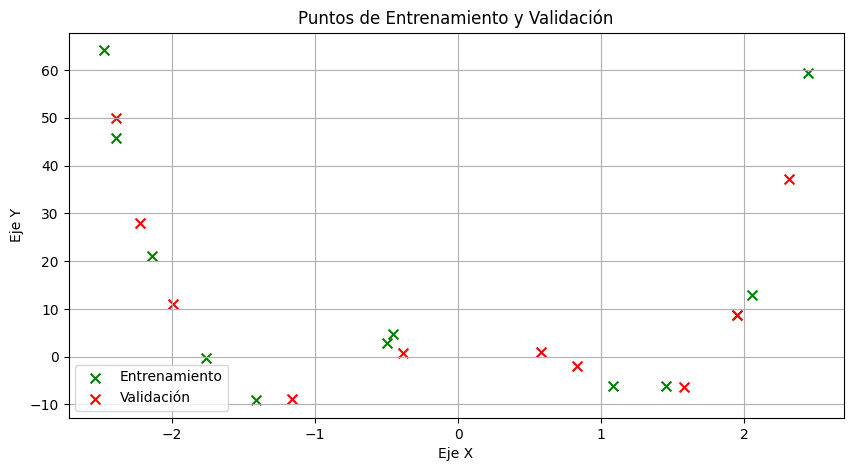

In [ ]:
plt.figure(figsize=(10, 5))

# Puntos de entrenamiento
plt.scatter(part2xtrain, part2ytrain, label='Entrenamiento', color='green', marker='x', s=50)

# Puntos de validación
plt.scatter(part2xVal, part2yVal, label='Validación', color='red', marker='x', s=50)

plt.title('Puntos de Entrenamiento y Validación')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.legend()
plt.grid(True)
plt.show()

# 2 A

Clase que permite crear modelos y evaluarlos en varios puntos

In [ ]:
class PolynomialRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, order):
        self.order = order
        self.model = None

    def fit(self, X, y):
        self.model = np.poly1d(np.polyfit(X, y, self.order))

    def predict(self, X):
        if self.model is None:
            raise ValueError("The model has not been trained yet. Call 'fit' first.")
        return self.model(X)


implementacion de diferentes ordenes para el modelo con  validacion cruzada y su mae y mse

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

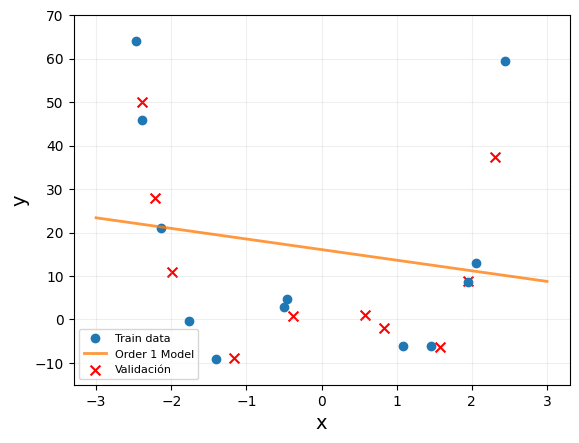

Polynomial Order: 1
Los coeficientes del modelo ajustado son:
 [-2.4377328  16.07647777]

---

MAE :
 17.02719024666234

---

MSE:
 526.7958944869426


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

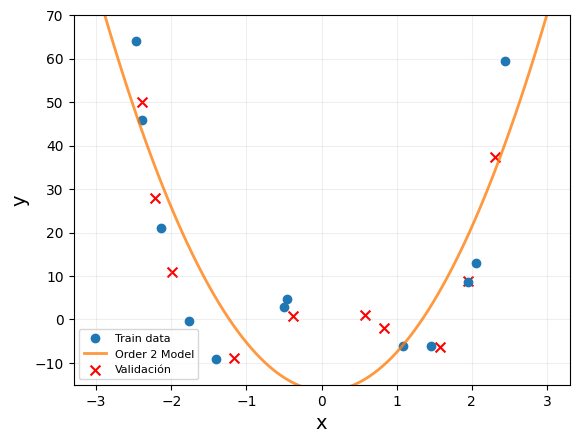

Polynomial Order: 2
Los coeficientes del modelo ajustado son:
 [  9.99631441  -1.13119757 -16.40718114]

---

MAE :
 14.483417556388071

---

MSE:
 241.8927737459976


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

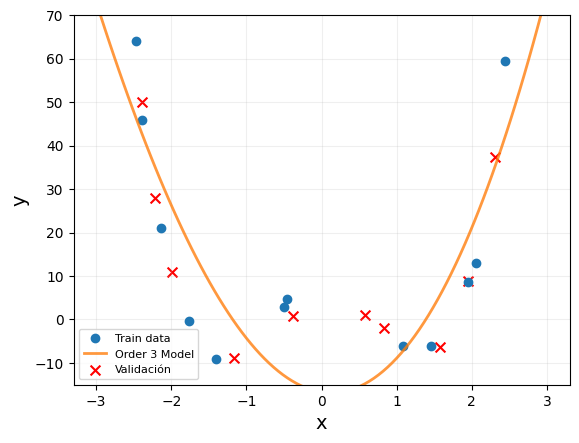

Polynomial Order: 3
Los coeficientes del modelo ajustado son:
 [  0.33544213  10.10281188  -2.64198852 -16.68746077]

---

MAE :
 16.8232675209236

---

MSE:
 402.34366253911475


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

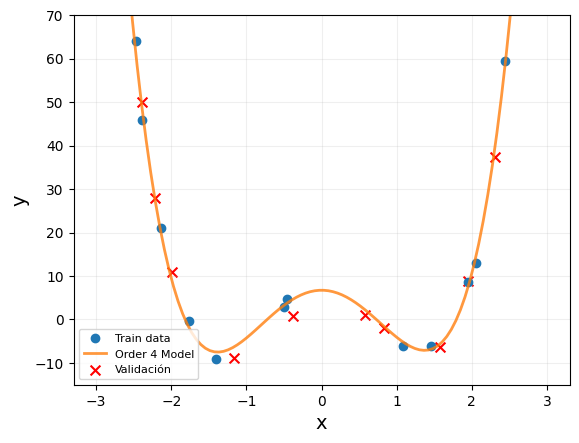

Polynomial Order: 4
Los coeficientes del modelo ajustado son:
 [  3.91219511   0.06033144 -14.81585256   0.03133066   6.73226767]

---

MAE :
 1.3974927357892188

---

MSE:
 2.934349097426318


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

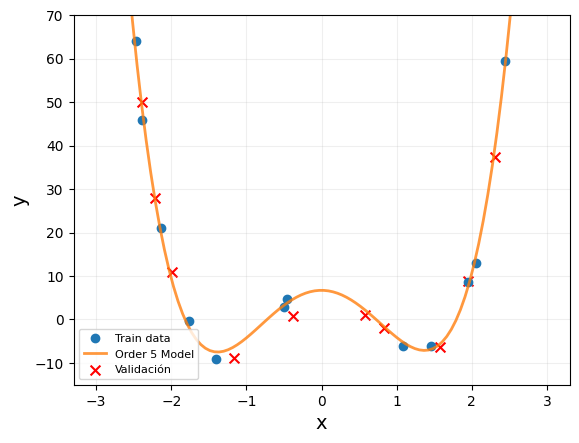

Polynomial Order: 5
Los coeficientes del modelo ajustado son:
 [-5.44334607e-03  3.91025180e+00  1.03850082e-01 -1.48019992e+01
 -4.19551892e-02  6.71108716e+00]

---

MAE :
 2.5693209915100974

---

MSE:
 14.449713371130764


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

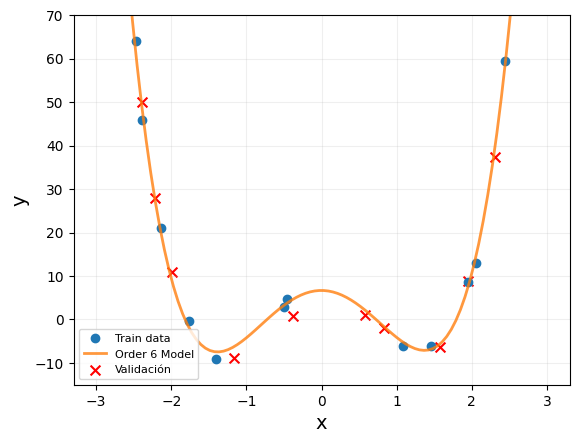

Polynomial Order: 6
Los coeficientes del modelo ajustado son:
 [ 2.75755479e-03 -6.69584552e-03  3.88359373e+00  1.14984387e-01
 -1.47348916e+01 -6.39481137e-02  6.67955543e+00]

---

MAE :
 4.626624367748913

---

MSE:
 38.35954639944199


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

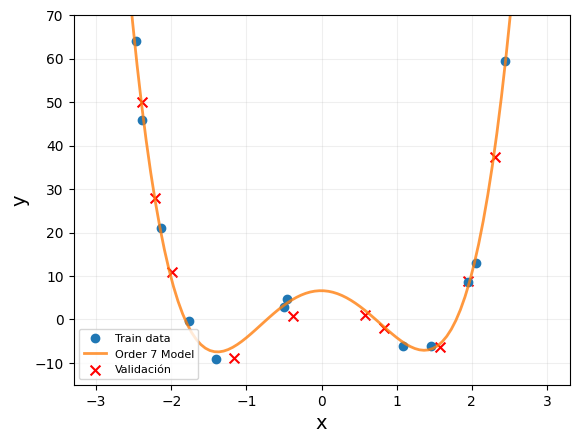

Polynomial Order: 7
Los coeficientes del modelo ajustado son:
 [ 2.90599219e-03  4.85437811e-03 -4.02035903e-02  3.86091771e+00
  2.30382630e-01 -1.46650879e+01 -1.76433555e-01  6.62545570e+00]

---

MAE :
 14.46041824446624

---

MSE:
 496.4922673198953


<IPython.core.display.Javascript object>

In [ ]:
from google.colab import widgets
x_LS = np.linspace(-3,3,100).T

orders = range(1,8)
tb = widgets.TabBar([str(order) for order in orders])

for order in orders:
  with tb.output_to(str(order), select= (order < 2)):
        model = PolynomialRegressor(order)

        # Perform 10-fold cross-validation and calculate MSE for each fold
        mae_scores = -cross_val_score(model, part2xVal, part2yVal, cv=5, scoring='neg_mean_absolute_error')
        mse_scores = cross_val_score(model, part2xVal, part2yVal, cv=5, scoring='neg_mean_squared_error')

        # Calculate the mean validation MSE score (convert to positive)
        mean_mae = np.mean(mae_scores)
        mean_mse = -np.mean(mse_scores)
        # Fit the model to the entire training data
        model.fit(part2xtrain, part2ytrain)

        # Plot the results for this order
        plt.plot(part2xtrain, part2ytrain, 'o', label='Train data')
        plt.plot(x_LS, model.predict(x_LS), '-', alpha=0.8, label=f'Order {order} Model', linewidth=2)

        plt.scatter(part2xVal, part2yVal, label='Validación', color='red', marker='x', s=50)
        plt.xlabel("x", fontsize=14)
        plt.ylabel("y", fontsize=14)
        plt.ylim(-15, 70)
        plt.grid(alpha=0.2)
        plt.legend(loc='lower left', fontsize=8)
        plt.show()

        print(f'Polynomial Order: {order}')
        print('Los coeficientes del modelo ajustado son:\n', model.model.c)
        print('\n---\n')
        print('MAE :\n', mean_mae)
        print('\n---\n')
        print('MSE:\n', mean_mse)



Despues de comparar vemos que mejora el modelo a medida que aumenta el grado sin embargo desde el grado 4 empieza a subir el mae y mse lo que indica que el mejor grado es el 4

# 2 B

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge, Lasso, RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import itertools
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
best_score = float('inf')  # Inicializar el mejor puntaje como infinito
best_degree = None
best_alpha = None
orders = range(1,8)
#vector de alphas
alphas= np.logspace(-10, 2, 200)

usamos ridge y evaluamos con validacion cruzada y varios alphas para ver cual es el mejor modelo con menor error

In [ ]:
for degree in orders:
    for alpha in alphas:
        # Preprocesa los datos con un transformador polinomial
        polynomial_features = PolynomialFeatures(degree=degree)
        X_poly = polynomial_features.fit_transform(part2xtrain.reshape(-1, 1))  # Reshape a matriz 2D

        # Normaliza las características
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_poly)

        # Inicializa el modelo RidgeCV con alphas y realiza la validación cruzada
        model = RidgeCV(alphas=[alpha], store_cv_values=True)
        kfold = KFold(n_splits=5)  # Puedes ajustar el número de splits
        mse_scores = -cross_val_score(model, part2xVal.reshape(-1,1), part2yVal.reshape(-1,1), cv=kfold, scoring='neg_mean_squared_error')

        # Calcula el promedio del error cuadrático medio
        avg_mse_score = np.mean(mse_scores)

        # Actualiza el mejor puntaje y los mejores hiperparámetros si es necesario
        if avg_mse_score < best_score:
            best_score = avg_mse_score
            best_degree = degree
            best_alpha = alpha

print(f"Mejor grado del polinomio: {best_degree}")
print(f"Mejor alpha (lambda): {best_alpha}")
print(f"Mejor puntaje MSE: {best_score}")

# Crear un modelo polinomial con el mejor grado
best_polynomial_features = PolynomialFeatures(degree=best_degree)
X_poly_train = best_polynomial_features.fit_transform(part2xtrain.reshape(-1, 1))
# Inicializar el modelo Ridge con el mejor alpha
best_model = Ridge(alpha=best_alpha)




Mejor grado del polinomio: 4
Mejor alpha (lambda): 1.1489510001873109e-10
Mejor puntaje MSE: 9.618692706026165


Esto arroja que el mejor modelo es de grao 4 con alpha de 1.1489510001873109e-10 y mse de 9.61

# 2c

implementamos el mejor modelo en ridge que nos dio el punto anterior y  realizamos bootstrap de 1000 samples

MSE en conjunto de validación: 3.8223763254539227
Media del MSE Bootstrap: 3.7683653819695664
Desviación estándar del MSE Bootstrap: 1.3581649093682477


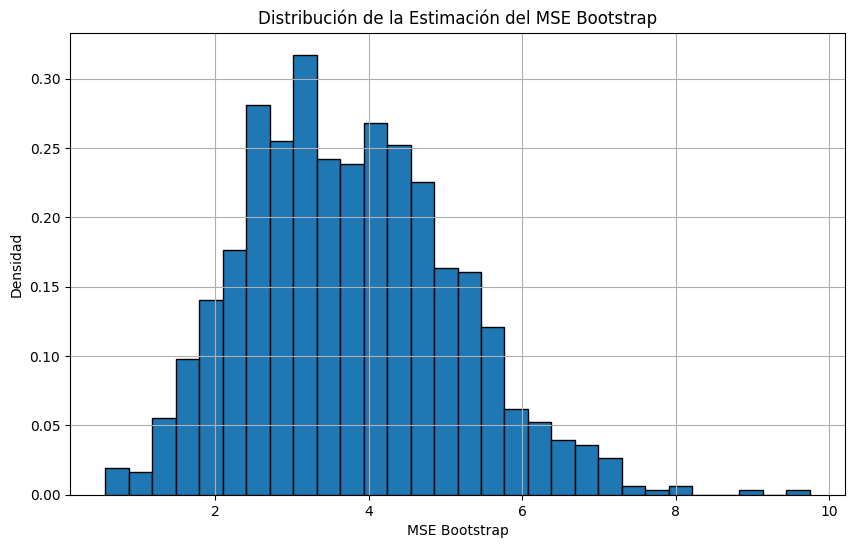

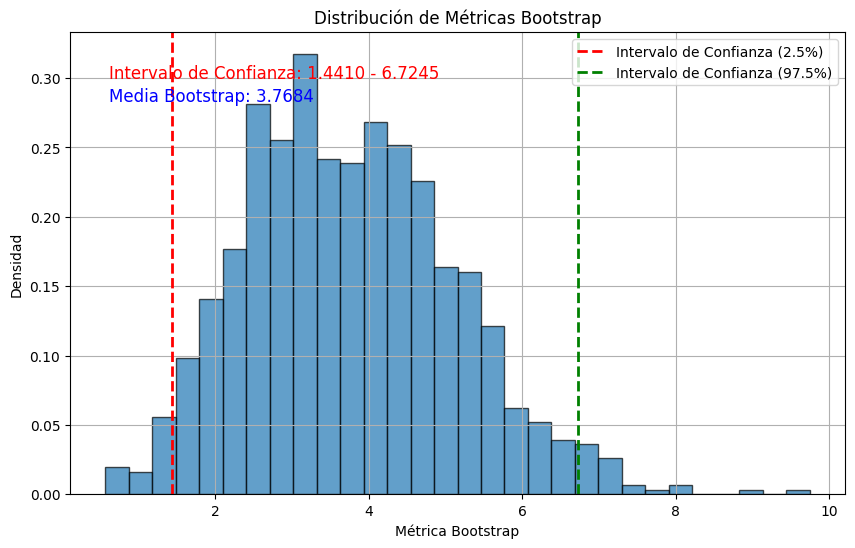

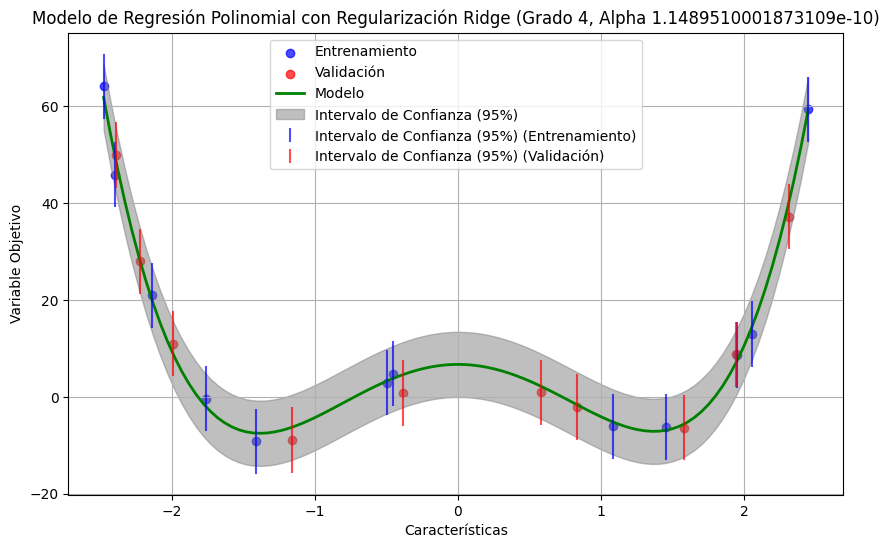

In [ ]:
x_train = np.load('part2xTrain.npy')  # Características de entrenamiento
y_train = np.load('part2yTrain.npy')  # Etiquetas de entrenamiento
x_val = np.load('part2xVal.npy')      # Características de validación
y_val = np.load('part24yVal.npy')     # Etiquetas de validación

# Crear características polinomiales para el conjunto de entrenamiento completo


best_degree = 4  # Reemplaza con el mejor grado de polinomio
best_alpha = 1.1489510001873109e-10 # Reemplaza con el mejor valor de alpha


poly = PolynomialFeatures(degree=best_degree)
x_train_poly = poly.fit_transform(x_train.reshape(-1, 1))

# Crear y entrenar un modelo de regresión Ridge con los mejores hiperparámetros
model = Ridge(alpha=best_alpha)
model.fit(x_train_poly, y_train)

# Predecir sobre un rango de valores para la visualización
x_range = np.linspace(min(x_train), max(x_train), 100).reshape(-1, 1)
x_range_poly = poly.transform(x_range)
y_pred = model.predict(x_range_poly)

# Calcular el MSE en el conjunto de validación
x_val_poly = poly.transform(x_val.reshape(-1, 1))
y_val_pred = model.predict(x_val_poly)
mse_val = mean_squared_error(y_val, y_val_pred)


# Implementar el procedimiento de bootstrap para estimar la distribución del MSE
num_bootstrap_samples = 1000
mse_bootstrap_samples = []

for _ in range(num_bootstrap_samples):
    # Genera una muestra bootstrap de los datos de validación
    random_indices = np.random.choice(len(x_val), size=len(x_val), replace=True)
    x_val_bootstrap = x_val[random_indices]
    y_val_bootstrap = y_val[random_indices]

    # Transforma las características polinómicas de la muestra bootstrap
    x_val_bootstrap_poly = poly.transform(x_val_bootstrap.reshape(-1, 1))

    # Realiza predicciones en la muestra bootstrap
    y_val_bootstrap_pred = model.predict(x_val_bootstrap_poly)

    # Calcula el MSE en la muestra bootstrap y lo agrega a la lista
    mse_bootstrap = mean_squared_error(y_val_bootstrap, y_val_bootstrap_pred)
    mse_bootstrap_samples.append(mse_bootstrap)

# Calcula estadísticas resumen de la distribución del MSE
mse_bootstrap_mean = np.mean(mse_bootstrap_samples)
mse_bootstrap_std = np.std(mse_bootstrap_samples)

print(f"MSE en conjunto de validación: {mse_val}")
print(f"Media del MSE Bootstrap: {mse_bootstrap_mean}")
print(f"Desviación estándar del MSE Bootstrap: {mse_bootstrap_std}")

# Histograma de densidad del MSE Bootstrap
plt.figure(figsize=(10, 6))
plt.hist(mse_bootstrap_samples, bins=30, density=True, edgecolor='k')
plt.xlabel('MSE Bootstrap')
plt.ylabel('Densidad')
plt.title('Distribución de la Estimación del MSE Bootstrap')
plt.grid(True)
plt.show()

confidence_interval = np.percentile(mse_bootstrap_samples, [2.5, 97.5])

# Calcula la media de las métricas bootstrap
metric_bootstrap_mean = np.mean(mse_bootstrap_samples)

# Grafica el histograma de las métricas bootstrap
plt.figure(figsize=(10, 6))
plt.hist(mse_bootstrap_samples, bins=30, density=True, edgecolor='k', alpha=0.7)
plt.axvline(confidence_interval[0], color='red', linestyle='dashed', linewidth=2, label='Intervalo de Confianza (2.5%)')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label='Intervalo de Confianza (97.5%)')
plt.xlabel('Métrica Bootstrap')
plt.ylabel('Densidad')
plt.title('Distribución de Métricas Bootstrap')
plt.legend()
plt.grid(True)


# Muestra el intervalo de confianza y la media en la figura
plt.annotate(f'Intervalo de Confianza: {confidence_interval[0]:.4f} - {confidence_interval[1]:.4f}',
             xy=(0.05, 0.9), xycoords='axes fraction', fontsize=12, color='red')
plt.annotate(f'Media Bootstrap: {metric_bootstrap_mean:.4f}',
             xy=(0.05, 0.85), xycoords='axes fraction', fontsize=12, color='blue')

plt.show()


# Calcular el intervalo de confianza del 95% para la métrica
confidence_interval = np.percentile(mse_bootstrap_samples, [2.5, 97.5])

# Graficar los datos de entrenamiento y validación, junto con el modelo
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, label='Entrenamiento', color='blue', alpha=0.7)
plt.scatter(x_val, y_val, label='Validación', color='red', alpha=0.7)
plt.plot(x_range, y_pred, label='Modelo', color='green', linewidth=2)
plt.xlabel('Características')
plt.ylabel('Variable Objetivo')
plt.legend()
plt.title(f'Modelo de Regresión Polinomial con Regularización Ridge (Grado {best_degree}, Alpha {best_alpha})')
plt.grid(True)

# Agregar barras de error para el intervalo de confianza alrededor del modelo
plt.fill_between(x_range.ravel(), y_pred - confidence_interval[1], y_pred + confidence_interval[1], color='gray', alpha=0.5, label='Intervalo de Confianza (95%)')

# Agregar barras de error para el intervalo de confianza alrededor de los datos de entrenamiento y validación
plt.errorbar(x_train, y_train, yerr=confidence_interval[1], fmt='none', color='blue', alpha=0.7, label='Intervalo de Confianza (95%) (Entrenamiento)')
plt.errorbar(x_val, y_val, yerr=confidence_interval[1], fmt='none', color='red', alpha=0.7, label='Intervalo de Confianza (95%) (Validación)')

plt.legend()
plt.show()

# Imprimir métrica real y estadísticas de intervalo de confianza
print(f'Métrica Real en Validación: {mse_val:.4f}')
print(f'Intervalo de Confianza (95%): {confidence_interval[0]:.4f} - {confidence_interval[1]:.4f}')



Hay tres graficas, \
 la primera muestra la funsion de densidad con respecto al mse que nos dice con cuanta frecuencia se dan los mse\
 La segunda nos muestrta que el valor medio es 3.87 y tambien nos dice el intervalo de confianza con el que hay menos mse, la linea roja muestra el limite de 2.5% es decir que es muy dificil que el mse sea menor que eso y la verde del 97.5% que nos dice que es altamente probable que este por debajo del valor ~6.7\
 La ultima muestra el modelo resultado que nos da que visualmente se ve bastante bien, el gris muestra que esta entre ese rango de valores con un 95% de confianza y los puntos muestran tambien su rango de confianza que esta en vertical debido a que es sabiendo la x predecir la y.